# Final 
## CS156, Kai Chang

### Question 1
Answer Choice: **E**, None of the above.<br>
Reasoning: A polynomial transformation of order $Q$ (specifically for dimension $d=2$, ie. $\left [x_1,x_2\right ]$) is essentially the number of possibilities scaling from $x_1, x_2$ to $x_1^Q, x_2^Q$. Thus, for order $Q=10$, we get 
$x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1x_2^2, x_1^2x_2, x_2^3, x_1^4, x_1x_2^3, x_1^2x_2^2, x_1^3x_2,x_2^4, ...$; we can see a pattern here that with each order $q$, we scale the total polynomial transformation by an addition $n+1$ features. 

For $Q=10$, we get $11+10+9+8+7+6+5+4+3+2 = 65$. And none of the options is a 65.

In [12]:
'''first term is 0 so is ignored, then we tack on a 1 for each 
    transformation to shift all feature transform sum by 1.'''
sum(range(11))+10

65

### Question 2
Answer Choice: **D**, $H$ is the logistic regression model<br>
Reasoning: This one can be selected off logical reasoning. Remember, $g_{avg}$ is the weighted sum for all $g_i$. For A singleton $H$, where there is only 1 hypothesis, the average will result in the same value, because there is only 1 hypothesis, and this is exactly $H$. Thus, A is ruled out. For B, since H is the set of all real valued hypothesis, the average of $g$ which is drawn from H is the average of these values, which is inherently in $H$ because the average of a subset of all real-valued numbers is also in the larger set of all real-valued numbers. Thus B is also not a possible solution. For C, a linear regression model spans all possible combination of values (ie. $ax+b$, where $a,b$ are constant values). So, if we take the average of a number of linear regression models, we will still arive a a linear regression model of $a'x+b'$, which is within $H$. Thus, C is also not a logical choice. D, however, is a logical choice because the logistic regression model relies on a tanh or sigmoid function, which maps from $-1$ to $1$ or $0$ to $1$ respectively. One cannot average the logistic regression models together, because you cannot add the logistic functions (tanh or sigmoid) together as the hypothesis is not linear in the parameters. The logistic models map with an s-curve, changing with steepness. The function is defined as:

\begin{equation}
    f(x) = \frac{e^{a+bx}}{1+e^{a+bx}}
\end{equation}

Summing two of them will result in two points of inflection, rather than a single point inflection as defined by our logistic model. Thus, D is the answer.

Source from edX link: http://math.stackexchange.com/questions/9595/properties-of-sigmoid-functions

### Question 3
Answer Choice: **D**, We can always determine if there is over tting by comparing the values of $(E_{out} - E_{in})$<br>
Reasoning: Overfitting your training data puts more weight on your random error or noise in the training set, drawing those out rather than your fundamental relationship (the one you desired). When you then test or validate your model, those noise and error may be different in profile from the noise and errors of your original training set (should be less important because your test or validation set should be larger than your training). Thus, your out of sample error should be larger than your in sample error. If the validation or test error increases while the training error decreases then you can assume that overfitting occurs.

### Question 4
Answer Choice: **D**, Stochastic noise does not depend on the hypothesis set.<br>
Reasoning: There are two types of noise: deterministic and stochastic noise. Deterministic noise is dependent on your hypothesis complexity (ie. value from true hypothesis), while stochastic noise is more of your conventional noise. Stochastic means randomly determined (ie. is really our random noise). And this is not functionally related to the hypothesis; it is directly tied with the data. 

### Question 5
Answer Choice: **A**, $w_{reg} = w_{lin}$<br>
Reasoning: Regularization of the hypothesis is constraining the weights. This means satisfying the following relationship $\nabla (E_{in}(w) + \lambda_Cw^T\Gamma^T\Gamma  w) |_{w=w_{reg}} = 0$, which for some $\lambda_C > 0$, $w_{reg}$ locally minimizes $E_{in}(w) + \lambda_Cw^T\Gamma^T \Gamma w$.

Now, from Exercise 4.4 in Yaser's book, with a linear regression weight of $w_{lin} = (Z^TZ)^{-1}Z^Ty$, the resulting $E_{in}=\frac{(w-w_{lin})^TZ^TZ(w-w_{lin}) + y^T(I-H)y}{N}$.

So, solving for the gradient of the augmented error, and setting the resulting expressions to 0, we get $w_{reg} = (Z^TZ + \lambda\Gamma^T\Gamma)^{-1}Z^TY$. Note, I did this by hand, and checked with @Shengbing's answer on the Caltech EdX forums.

Now because we know that the linear weight is a solution (optimized) and that is $w_{lin} = (Z^TZ)^{-1}Z^Ty$, with constraint $w_{lin}^Tw_{lin} \leq C$, and this can be varified in our gradient expression, and the generalized augmented error is of form $E_{in} + \frac{\lambda}{N}\Omega(h)$, the $w_{reg} = (Z^TZ + \lambda I)^-1Z^Ty$. Comparing this generalized $w_{reg}$ *for linear models with weight decays*, we see that the Tikhonov regularization constraints $\Gamma^T \Gamma$ is equivalent to the the identity matrix, meaning that $w_{reg} = w_{lin}$, and thus our answer choice is A.

### Question 6
Answer Choice: **B**, translated to augmented error<br>
Reasoning: We know from Lecture 12 and from the general regularization in Yaser's book, soft-order constraints regularizing polynomial models has us minimizing $E_{aug}$. Thus, the constraints can be translated into augmented error. The choice B is correct. Note that we cannot write soft-order as hard-order constraints because hard-order constraints have no upper bound, so A is incorrect. We also cannot determine the value of the VC dimensionality, as that results from solving our $E_{aug}$, and we cannot decrease both $E_{in}$ and $E_{out}$ explicitly, because regularization penalizes the in sample error in order to improve the out of sample error. Thus, this is more random. Choice C, D are incorrect. And E is not correct.

### Question 7
Answer Choice: **D**, 8 versus all<br>
Reasoning: We see that this regularization in the least-squares linear regression is just another form of the regularization of the weight decay from homework six, so we can use the code derived there. For mor einformation about this weight decay and the agumented error, one can refer to page 132 in Yaser's book or slide 11 and slide 14 in lecture 12.

In [90]:
'''
Data is structured in text file as : digit intensity symmetry
Data will be structured in program as: [[digit, intensity, symmetry]]
'''

import numpy as np

t_d = np.loadtxt('features.train')
x_train = t_d[:,1:]
y_train = t_d[:,0]

In [2]:
def bin_class(y, n):
    '''
    Applies the one-versus-all binary classifier. Can be used for the 
    one-versus-one binary classifier through a computational trick.
    
    Parameters
    ----------
    y : dataset output, numpy array
    n : one digit value to classify as +1
    
    Returns
    -------
    numpy array of binary classified values
    '''
    y_bin = -np.ones(len(y))
    y_bin[y == n] = 1
    return y_bin

In [26]:
def trnsfm_7(x):
    '''
    Transforms current features into a new set of feature specifically for
    question 7. In this case, no transform.
    
    Parameters
    ----------
    x : current feature list (x1, x2)
    
    Returns
    -------
    new feature set (1, x1, x2)
    '''
    x_t = np.ones((x.shape[0],1))
    return np.hstack((x_t, x))

In [120]:
def calc_suedo_reg(x_train, lmda):
    ''' With weight decay.'''
    return np.dot( np.linalg.inv( np.dot( x_train.T, x_train) + lmda*np.identity(x_train.shape[1])), x_train.T)

def lin_reg_reg(x_pseudo, y):
    ''' With weight decay.'''
    return np.dot(x_pseudo, y)

def calc_error(w, x_, y_):
    '''
    Calculates the E_out (error of out sample)
    
    Parameters
    ----------
    w  : weights learned from linear regression, numpy array
    x_ : dataset, multi-dimensional numpy array
    y_ : output (solution), numpy array
    
    Returns
    -------
    E_out
    '''
    N = 0
    for i in xrange(x_.shape[0]):
        N += max(0, np.sign(-np.dot(w.T, x_[i])*y_[i]))
    
    return N/float(x_.shape[0])

In [91]:
# initial parameters
lmda = 1.0

# transform x data
z_train = trnsfm_7(x_train)

for n in [5, 6, 7, 8, 9]:
    # apply binary classification
    y_train_t = bin_class(y_train, n)
    
    suedo_reg = calc_suedo_reg(z_train, lmda)
    w_reg = lin_reg_reg(suedo_reg, y_train_t)

    err_train_reg = calc_error(w_reg, z_train, y_train_t)
    print 'Training classification error for "%i versus all": ' %n, err_train_reg

Training classification error for "5 versus all":  0.0762584007681
Training classification error for "6 versus all":  0.0910711836511
Training classification error for "7 versus all":  0.0884652311068
Training classification error for "8 versus all":  0.0743382252092
Training classification error for "9 versus all":  0.0883280757098


### Question 8
Answer Choice: **B**, 1 versus all <br>
Reasoning: see code. Now we apply more polynomial (non-linear) transformation.

In [107]:
te_d = np.loadtxt('features.test')
x_test = te_d[:,1:]
y_test = te_d[:,0]

In [121]:
def trnsfm_8(x):
    '''
    Transforms current features into a new set of feature specifically for
    question 7. In this case, no transform.
    
    Parameters
    ----------
    x : current feature list (x1, x2)

    Returns
    -------
    new feature set (1, x1, x2,x1x2, x1^2, x2^2)
    '''
    x_t = np.ones((x.shape[0],1))
    return np.hstack((x_t, x[:,[0]],x[:,[1]], x[:,[1]]*x[:,[0]], x[:,[0]]**2, x[:,[1]]**2))

In [122]:
# initial parameters
lmda = 1.0

# transform x data
z_train = trnsfm_8(x_train)
z_test = trnsfm_8(x_test)

for n in [0,1,2,3,4]:
    # apply binary classification
    y_train_t = bin_class(y_train, n)
    y_test_t = bin_class(y_test, n)
    
    suedo_reg = calc_suedo_reg(z_train, lmda)
    w_reg = lin_reg_reg(suedo_reg, y_train_t)

    err_test_reg = calc_error(w_reg, z_test, y_test_t)
    print 'Test classification error for "%i versus all": ' %n, err_test_reg

Test classification error for "0 versus all":  0.106626806178
Test classification error for "1 versus all":  0.02192326856
Test classification error for "2 versus all":  0.0986547085202
Test classification error for "3 versus all":  0.0827105132038
Test classification error for "4 versus all":  0.0996512207275


### Question 9
Answer Choice: **E**, The transform improves the out-of-sample performance of '5 versus all', but by less than 5%<br>
Reasoning: see code. We just need to find a single counter part to disprove each answer choice. A is disproven by the '2 versus all' case, B is disproven by the '2 versus all' case, C is disproven by the '1 versus all' case, D is disproven by the '5 versus all' case, and E, which only looks for '5 versus all' in it's condition, is correct becuase the transform (z) improves the out of sample performance by $(0.0792227204783-0.079720976582)/0.079720976582 = 0.006250000001$, or $0.6\%$.

In [123]:
# initial parameters
lmda = 1.0

# non-transformed x data
x_train_t = trnsfm_7(x_train)
x_test_t = trnsfm_7(x_test)

# transform x data
z_train = trnsfm_8(x_train)
z_test = trnsfm_8(x_test)

print 'Structure is E_in, E_in_T, E_out, E_out_T'
for n in xrange(10):
    # apply binary classification
    y_train_t = bin_class(y_train, n)
    y_test_t = bin_class(y_test, n)
    
    # run regularization weight for non-transformed data
    suedo_reg_x = calc_suedo_reg(x_train_t, lmda)
    w_reg_x = lin_reg_reg(suedo_reg_x, y_train_t)
    
    # run regularization weight for transformed data
    suedo_reg_z = calc_suedo_reg(z_train, lmda)
    w_reg_z = lin_reg_reg(suedo_reg_z, y_train_t)

    # train errors (in sample)
    err_train_reg_x = calc_error(w_reg_x, x_train_t, y_train_t)
    err_train_reg_z = calc_error(w_reg_z, z_train, y_train_t)
    
    # test errors (out of sample)
    err_test_reg_x = calc_error(w_reg_x, x_test_t, y_test_t)
    err_test_reg_z = calc_error(w_reg_z, z_test, y_test_t)
    
    print '%i versus all: ' %n, err_train_reg_x, err_train_reg_z, err_test_reg_x, err_test_reg_z

Structure is E_in, E_in_T, E_out, E_out_T
0 versus all:  0.109312851461 0.10231792621 0.11509715994 0.106626806178
1 versus all:  0.0152242490742 0.0123439857358 0.0224215246637 0.02192326856
2 versus all:  0.100260595254 0.100260595254 0.0986547085202 0.0986547085202
3 versus all:  0.0902482512687 0.0902482512687 0.0827105132038 0.0827105132038
4 versus all:  0.0894253188863 0.0894253188863 0.0996512207275 0.0996512207275
5 versus all:  0.0762584007681 0.0762584007681 0.079720976582 0.0792227204783
6 versus all:  0.0910711836511 0.0910711836511 0.0847035376183 0.0847035376183
7 versus all:  0.0884652311068 0.0884652311068 0.0732436472347 0.0732436472347
8 versus all:  0.0743382252092 0.0743382252092 0.0827105132038 0.0827105132038
9 versus all:  0.0883280757098 0.0883280757098 0.0881913303438 0.0881913303438


### Question 10
Answer Choice: **A**, Overfitting occurs (from $\lambda = 1$ to $\lambda = 0.01$)<br>
Reasoning: see code.

In [125]:
# 1 versus 5 classifier (database creation)
z_train_c = trnsfm_8(x_train[np.logical_or(y_train==1, y_train==5), :])
y_train_c = bin_class(y_train[np.logical_or(y_train==1, y_train==5)], 1)

z_test_c = trnsfm_8(x_test[np.logical_or(y_test==1, y_test==5), :])
y_test_c = bin_class(y_test[np.logical_or(y_test==1, y_test==5)], 1)

print 'format is E_in, E_out'
for lmda in [0.01, 1.0]:
    suedo_reg = calc_suedo_reg(z_train_c, lmda)
    w_reg = lin_reg_reg(suedo_reg, y_train_c)
    
    err_train_reg = calc_error(w_reg, z_train_c, y_train_c)
    err_test_reg = calc_error(w_reg, z_test_c, y_test_c)
    
    print 'For lambda = %f: ' %lmda, err_train_reg, err_test_reg

format is E_in, E_out
For lambda = 0.010000:  0.00448430493274 0.0283018867925
For lambda = 1.000000:  0.00512491992313 0.0259433962264


### Question 11
Answer Choice: **C**, 1, 0, -0.5<br>
Reasoning: see code. Note, we choose to use a high C value because we want to maximize the margin in the Z-space. We know the C parameter in SVM for the cost function, and it essentially tells you how much the weight you have for each misclassification. A larger C value will give you a low bias and high variance -- it'll increase the penalty of a missclassification. For a small C, we have higher bias and smaller variance. We get misclassified samples more often this way, even if we have linearly separable data. Large C is essentially a hard margin.

Good explanation I took from: http://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

In [44]:
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

def z_transform(x_i):
    return [x_i[1]**2 - 2 * x_i[0] - 1, x_i[0]**2 - 2 * x_i[1] + 1]

z = np.apply_along_axis(z_transform, 1, x)

In [62]:
from sklearn import svm
'''
The kernel function can be any of the following:
    linear: <x, x'>
    polynomial: (γ<x, x'> + r)^d, γ = gamma, d = degree, r = coef0
    rbf: exp(-γ|x-x'|^2). γ = gamma, must be > 0
    sigmoid (tanh(γ<x,x'> + r)), γ = gamma, r = coef0

From directly the link: http://scikit-learn.org/stable/modules/svm.html.
Note < > suggests dot product with transpose, ie. <x, x'> = x^T . x'
'''

clf = svm.SVC(kernel='linear', C = 100)
clf.fit(z,y)
y_ = clf.predict(z)
E_in = np.sum(abs(y_ + y) == 0) / float(len(y_))
print 'E_in for linear: ', E_in # as expected, E_in = 0 for this particular set
print 'weights: ', clf.coef_, ', bias: ', clf.intercept_
weights = np.round(clf.coef_/2,decimals=2)
bias = np.round(clf.intercept_/2,decimals=2)
print 'normalized weights: ', weights, ', normalized bias: ', bias

E_in for linear:  0.0
weights:  [[  1.99980800e+00   6.40000000e-05]] , bias:  [-1.00002133]
normalized weights:  [[ 1.  0.]] , normalized bias:  [-0.5]


### Question 12
Answer Choice: **C**, 4-5<br>
Reasoning: see code.

In [67]:
clf = svm.SVC(kernel='poly', degree=2, coef0=1, C=100)
clf.fit(z,y)
y_ = clf.predict(z)
E_in = np.sum(abs(y_ + y) == 0) / float(len(y_))
print 'E_in for polynomial: ', E_in # as expected, E_in = 0 should be for this particular set
print 'SVC support vectors: ', clf.support_vectors_.shape[0]

E_in for polynomial:  0.0
SVC support vectors:  4


### Question 13
Answer Choice: **A**, $\leq 5\%$ of the time.<br>
Reasoning: see code. Note this is the kernel RBF (hard margin SVM). A,E,D

In [470]:
import random as rnd

def fxn(x_i):
    return np.sign(x_i[1] - x_i[0] + 0.25*np.sin(np.pi*x_i[0]))

def gen_pts(n):
    # n = number of points
    x = np.array([[rnd.uniform(-1,1),rnd.uniform(-1,1)] for i in range(n)])
    y = map(fxn, x)
    return x, np.array(y)

In [105]:
gamma = 1.5
clf = svm.SVC(kernel='rbf', coef0=1, C=np.inf, gamma=gamma)
fail_score = 0

for i in xrange(1000):
    x,y = gen_pts(100)
    clf.fit(x,y)
    E_in = 1.0 - clf.score(x,y)
    if E_in != 0:
        fail_score += 1
print 'Unseparable % by RBF kernel: ', fail_score/float(1000)

Unseparable % by RBF kernel:  0.0


### Question 14
Answer Choice: **E**, $> 75\%$ of the time<br>
Reasoning: see code. Note, I took the k means clustering algorithm from my Ay119 project code. That was originally taken from a barebone template code online (I think it's python the hard way or some similar site). Either way, I had used this in my previous project, so I didn't really write much because it was a generalized k-clustering algo.

In [497]:
def k_means(K, x_):
    '''
    K represents number of clusters. Shamelessly taken from one of 
    my old computational project. I would like to write a new one out,
    but I understand the concept.
    
    Parameters
    ----------
    K  : number of centers
    x_ : dataset
    
    Returns
    -------
    centers, and resulting x_ sorted into these "clusters".
    '''
    # get random nodes
    o_centers = np.array([[0,0] for i in xrange(K)])
    n_centers = np.array([[rnd.uniform(-1,1),rnd.uniform(-1,1)] for i in xrange(K)])
            
    while not (set([tuple(k) for k in o_centers]) == set([tuple(k) for k in n_centers])):
        o_centers = n_centers
        clusters = {}
        for x in x_:
            mu = min([(i[0], np.linalg.norm(x-o_centers[i[0]])) for i in enumerate(n_centers)], key=lambda t: t[1])[0]
            try:
                clusters[mu].append(x)
            except KeyError:
                clusters[mu] = [x]
        n_centers = []
        keys = sorted(clusters.keys())
        for k in keys:
            n_centers.append(np.mean(clusters[k], axis=0))
    return np.array(o_centers), clusters

In [561]:
def non_empty_kmeans(K, x_):
    '''
    Makes sure we have non-empty clusters.
    
    Returns
    -------
    K-centers desired and non-empty clusters
    '''
    n_centers = 0
#     resim = 0
    while n_centers != K:
        centers, clusters = k_means(K, x_)
        n_centers = len(centers)
#         resim += 1
#         if resim > 0:
#             print 're-simulating k-clusters..'
                
    return centers, clusters

In [562]:
def rbf_reg_model(x, center, gamma):
    ''' The radial basis function model'''
    return np.exp(-gamma * np.sum((x - center)**2))

def rbf_reg(x, centers, gamma):
    ''' Calculates the appropriate values within the RBF regular model. Note we added
    a bias term in the beginning'''
    z = np.empty((x.shape[0], centers.shape[0] + 1))
    z[:,0] = np.ones(x.shape[0])
    for i in xrange(centers.shape[0]):
        z[:, i+1] = np.apply_along_axis(rbf_reg_model, 1, x, centers[i], gamma)

    return z

def calc_w(z, y):
    ''' Derives the weights using a form of LR. The lambda term is non-significant in our RBF model.'''
    m = np.matrix(np.dot(z.T, z))
    b = np.dot(np.dot(m.getI(), z.T), y)
    return b.getA()[0,:]

def rbf_reg_predict(z, w):
    ''' Returns y based on learning algorithm.'''
    return np.dot(z, w)

In [498]:
# parameters
gamma = 1.5
K = 9
n = 100

E_out_ker = []
E_out_reg = []

for i in xrange(100):
    
    x, y = gen_pts(n)
    x_test, y_test = gen_pts(1000)
    
    # RBF Kernel
    clf = svm.SVC(kernel='rbf', coef0=1, C=np.inf, gamma=gamma)
    clf.fit(x,y)
    while clf.score(x,y) != 1.0:
        x,y = gen_pts(n)
        clf.fit(x,y)
    E_out_ker.append(1.0 - clf.score(x_test,y_test))
    
    
    # RBF Regular
    centers, clusters = non_empty_kmeans(K, x)
    
    z = rbf_reg(x, centers, gamma)
    w = calc_w(z, y)
    
    z_test = rbf_reg(x_test, centers, gamma)
    y_ = rbf_reg_predict(z_test, w)
    E_out_reg.append(np.sum(y_*y_test < 0) / float(y_test.shape[0]))

diff = np.array(E_out_ker) - np.array(E_out_reg)
print 'Percent of time RBF kernel beat regular: ', np.sum(i < 0 for i in diff)/float(len(diff))

Percent of time RBF kernel beat regular:  0.87


We check our results from the k-means clustering algorithm.

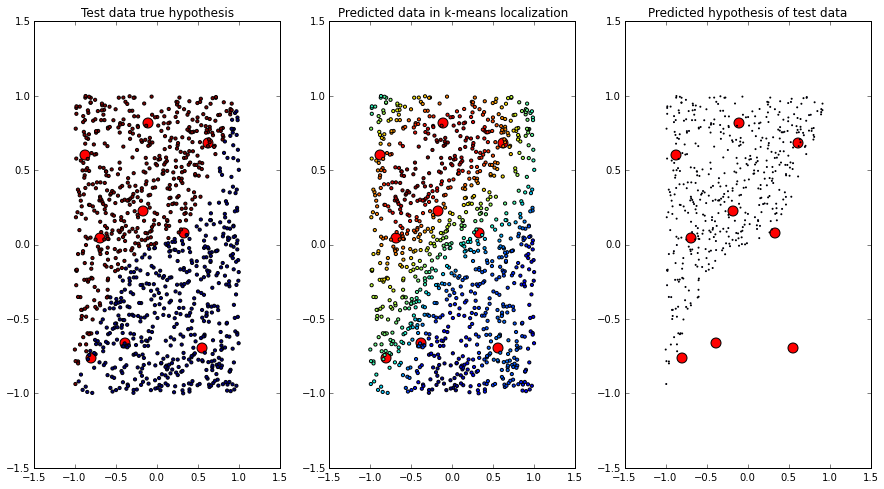

In [560]:
f, ax = plt.subplots(1,3)
ax[0].scatter(centers[:,0], centers[0:,1], c ='r', marker='o', s=100)
ax[1].scatter(centers[:,0], centers[0:,1], c ='r', marker='o', s=100)
ax[2].scatter(centers[:,0], centers[0:,1], c ='r', marker='o', s=100)
ax[0].scatter(x_test[:,0], x_test[:,1], c=y_test, s=10)
ax[1].scatter(x_test[:,0], x_test[:,1], c=y_, s=10)
ax[2].scatter(x_test[:,0], x_test[:,1], y_test)
ax[0].set_title('Test data true hypothesis')
ax[1].set_title('Predicted data in k-means localization')
ax[2].set_title('Predicted hypothesis of test data')
f.set_size_inches(15,8)

### Question 15
Answer Choice: **D**, $>60\%$ but $\leq 90\%$ of the time <br>
Reasoning: see code.

Percent of time RBF kernel beat regular:  0.88


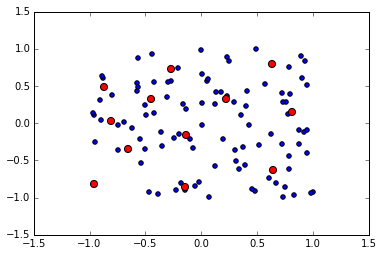

In [500]:
import matplotlib.pyplot as plt
%matplotlib inline

# parameters
gamma = 1.5
K = 12
n = 100

E_out_ker = []
E_out_reg = []

for i in xrange(100):
    
    x, y = gen_pts(n)
    x_test, y_test = gen_pts(1000)
    
    # RBF Kernel
    clf = svm.SVC(kernel='rbf', coef0=1, C=np.inf, gamma=gamma)
    clf.fit(x,y)
    while clf.score(x,y) != 1.0:
        x,y = gen_pts(n)
        clf.fit(x,y)
    E_out_ker.append(1.0 - clf.score(x_test,y_test))
    
    
    # RBF Regular
    centers, clusters = non_empty_kmeans(K, x)

    # confirms lloyd algorithm working properly
    if i == 1:
        plt.scatter(x[:,0], x[:,1])
        plt.scatter(centers[:,0], centers[0:,1], c ='r', marker='o', s=50)
    
    z = rbf_reg(x, centers, gamma)
    w = calc_w(z, y)
    
    z_test = rbf_reg(x_test, centers, gamma)
    y_ = rbf_reg_predict(z_test, w)
    E_out_reg.append(np.sum(y_*y_test < 0) / float(y_test.shape[0]))

diff = np.array(E_out_ker) - np.array(E_out_reg)
print 'Percent of time RBF kernel beat regular: ', np.sum(i < 0 for i in diff)/float(len(diff))

### Question 16
Answer Choice: **D**, Both $E_{in}$ and $E_{out}$ go down. <br>
Reasoning: see code. Note, I could use a logical *and* function, but this seemed much easier and more intuitive, because the logical *and* usually implies a single dataframe, not comparing two.

In [545]:
# parameters
gamma = 1.5

E_in_reg = []
E_out_reg = []

for K in [9, 12]:
    for i in xrange(100):
        x,y = gen_pts(100)
        x_test, y_test = gen_pts(1000)

        # RBF Regular
        centers, clusters = non_empty_kmeans(K, x)

        z = rbf_reg(x, centers, gamma)
        w = calc_w(z, y)
        y_ = rbf_reg_predict(z, w)
        E_in_reg.append(np.sum(y_*y < 0) / float(y_test.shape[0]))

        z_test = rbf_reg(x_test, centers, gamma)
        y_ = rbf_reg_predict(z_test, w)
        E_out_reg.append(np.sum(y_*y_test < 0) / float(y_test.shape[0]))

E_in_reg = np.array(E_in_reg).reshape(2,100).T
E_out_reg = np.array(E_out_reg).reshape(2,100).T

print 'E_in down, E_out up: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] > 0) & (E_out_reg[:,0]-E_out_reg[:,1] < 0))
print 'E_in up, E_out down: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] < 0) & (E_out_reg[:,0]-E_out_reg[:,1] > 0))
print 'E_in, E_out up: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] < 0) &  (E_out_reg[:,0]-E_out_reg[:,1] < 0))
print 'E_in, E_out down: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] > 0) & (E_out_reg[:,0]-E_out_reg[:,1] > 0))
print 'E_in, E_out remain same: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] == 0) &  (E_out_reg[:,0]-E_out_reg[:,1] == 0))

E_in down, E_out up:  20
E_in up, E_out down:  15
E_in, E_out up:  8
E_in, E_out down:  46
E_in, E_out remain same:  1


### Question 17
Answer Choice: **C**, Both $E_{in}$ and $E_{out}$ go down <br>
Reasoning: see code.

In [546]:
# parameters
K = 9

E_in_reg = []
E_out_reg = []

for gamma in [1.5, 2]:
    for i in xrange(100):
        x,y = gen_pts(100)
        x_test, y_test = gen_pts(1000)

        # RBF Regular
        centers, clusters = non_empty_kmeans(K, x)

        z = rbf_reg(x, centers, gamma)
        w = calc_w(z, y)
        y_ = rbf_reg_predict(z, w)
        E_in_reg.append(np.sum(y_*y < 0) / float(y_test.shape[0]))

        z_test = rbf_reg(x_test, centers, gamma)
        y_ = rbf_reg_predict(z_test, w)
        E_out_reg.append(np.sum(y_*y_test < 0) / float(y_test.shape[0]))

E_in_reg = np.array(E_in_reg).reshape(2,100).T
E_out_reg = np.array(E_out_reg).reshape(2,100).T

print 'E_in down, E_out up: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] > 0) & (E_out_reg[:,0]-E_out_reg[:,1] < 0))
print 'E_in up, E_out down: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] < 0) & (E_out_reg[:,0]-E_out_reg[:,1] > 0))
print 'E_in, E_out up: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] < 0) &  (E_out_reg[:,0]-E_out_reg[:,1] < 0))
print 'E_in, E_out down: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] > 0) & (E_out_reg[:,0]-E_out_reg[:,1] > 0))
print 'E_in, E_out remain same: ', np.sum((E_in_reg[:,0]-E_in_reg[:,1] == 0) &  (E_out_reg[:,0]-E_out_reg[:,1] == 0))

E_in down, E_out up:  14
E_in up, E_out down:  20
E_in, E_out up:  40
E_in, E_out down:  16
E_in, E_out remain same:  0


### Question 18
Answer Choice: **A**, $\leq 10\%$ of the time <br>
Reasoning: see code.

In [543]:
# parameters
gamma = 1.5
K = 9
n = 100

E_in_reg = []

for i in xrange(100):
    x, y = gen_pts(n)
    
    # RBF Regular
    centers, clusters = non_empty_kmeans(K, x)
    
    z = rbf_reg(x, centers, gamma)
    w = calc_w(z, y)
    
    y_ = rbf_reg_predict(z, w)
    E_in_reg.append(np.sum(y_*y < 0) / float(y_test.shape[0]))

print 'Percent of time RBF regular has E_in = 0 error: ', np.sum(E_in == 0 for E_in in E_in_reg)/float(len(E_in_reg))

Percent of time RBF regular has E_in = 0 error:  0.03


### Question 19
Answer Choice: **B**, The posterior increases linearly over [0,1]<br>
Reasoning: We know from Bayesian inference, that the posterior is proportional to the prior times the likelihood. 

We assume the prior, $P(h=f)$, to be uniform, ie. we consider the prior to be uniformative. Thus, the posterior is very much determined by the data (ie. the posterior is data driven). The prior states the probability that each hypothesis from the hypothesis set (drawn from [0,1]) is assumed to equally likely. Consider $X$ as our sample, and our paramter is $\theta$. Then, the posterior is given by $P(\theta|D) \ \ \alpha \ \ P(D|\theta)P(\theta)$.

Now, because we have a data with a binary y (yes or no), following the likelihood in slide 14 of lecture 9, we see that $P(y|x) = h(x)$ for $y = +1$ and $1-h(x)$ for $y=-1$. And because we have the positive heart attack from our 1 dataset, we have $P(y|x) = h(x)$. Now becuase you cannot have percentage of a heart attack or not, meaning you either have it or don't when you sample, we can consider the likelihood function to be of a binomial distribution. Thus, we have$P(D=1 | p)  = p^k(1-p)^{n-k}$. We are also assuming an uniformative prior, meaning our prior is $P(h=f) = \frac{1}{a-b} = \frac{1}{1-0} = 1$. Now, multiplying these together, we get $f(p|D) = p^k(1-p)^{n-k}f(p) = p^k(1-p)^{n-k}*1= p^k(1-p)^{n-k}$. Because $n=1$, that is our sample size, and we have $k=1$ sucesss (heart attack for a person is considered a success, unfortunately), then our posterior is simply $p$ or $h(x)$, which increases linearly over [0,1]. 


### Question 20
Answer Choice: **C**, $E_{out}(g)$ cannot be worse than the average of $E_{out}(g_1)$ and $E_{out}(g_2)$ <br>
Reasoning: The mean squared error allows for the error to be less than the average of two individual hypotheses mean squared error. The key here lies in the mean squared aspect. We know the mean squared error is defined as $E_{out}(x) = [g(x) - f(x)]^2$. This all boils down to algebra. Consider the aggregate hypothesis of $g$ -- we know that the hypothesis will be somewhere in between $g_1$ and $g_2$ (if $g$ is of any polynomial). Thus, consider the mean squared error (the sum of the difference squared), the average of the two hypothesis residuals squared will still be higher than the squared of the average hypothesis residuals. Consider $8^2$ + $2^2$ and averaging that versus taking the average, $5$, and squaring it. $8^2$ will always be larger than $5^2$. This case has to be true, while others could have explicit cases where it contradicts.

To prove some counter cases -- it's easy to show A is false, in any case where $g_2$ is a poor hypothesis choice for it's true hypothesis $f_2(x)$, poor relative to $g_1$ acting on $f_1(x)$, the out of sample error for $g$ will always be worse than the originally better of the two hypothesis. This also rules out E. The contradicting case for B arrives from the answer choice C. D is tricky -- one may think $E_{out}(g)$ has to be in between the out of samples for the two bounding hypothesis, but these two bounding hypothesis aren't really bounding. If you consider two hypothesis that EACH are subsets of the mean hypothesis, in which they both fill let's say half of the needed information for the true $f(x)$, then the out of sample for the aggregate hypothesis will indeed be better than both of the individual hypothesis that makes the aggregate. Consider a simple linear regression, where the classification boundary is on the x-axis. Now, if we have one hypothesis above the x-axis some $y$ distance away, and another hypothesis also some y-distance away, but below the x-axis, the agreggate hypothesis $g$ derived from the two $g_1, g_2$ will be exactly the x-axis, which will give us a perfect out-of-sample error. This is better than the two hypotheses aggregated for $g$.